# ***Итераторы-генераторы***

---
**Материал подготовил Давид Драмбян**


Приступим к изучению важной темы `итераторов-генераторов`. 

В этой статье мы углубимся в понимание итераторов и работы с ними в Python, а также разберем устройство популярного цикла `for`.

***1. Итерация и механизм ее работы***

В начале следует разобраться в 3 терминах: `итерируемые объекты`, `итератор`, `итерировать`. Уже звучит пугающе? Давайте разберемся!

`Итерируемые объекты` - это последовательности, как списки, строки и кортежи. Однако если элементы последовательности упорядочены, то элементы итерируемых объектов - нет.

In [1]:
x = [1, 2, 3]

Из любого `итерируемого объекта` мы можем получить `итератор` с помощью встроенной функции `iter`.

In [2]:
x_iterators = iter(x)

Сам по себе `итератор` - это некая сущность, которую мы можем `итерировать`, 
то есть повторять определенную оперцию, используя результат предыдущей аналогичной операции.

Рассмотрим это на примере встроенной функции `next`:

In [3]:
next(x_iterators)

1

Повторяя операцию `next`, Python помнит результат прошлой операции, то есть помнит, что уже выводил `1`:

In [4]:
next(x_iterators)

2

In [5]:
next(x_iterators)

3

Когда мы перебрали все элементы итератора, функция выводит исключение `StopIteration`. Это означает, что итератор `x_iterators` теперь пуст и, следовательно, бесполезен в использовании.

In [6]:
next(x_iterators)

StopIteration: 

Важно: **Итератор может быть использован только один раз.** 

In [8]:
print(list(x_iterators))

[]


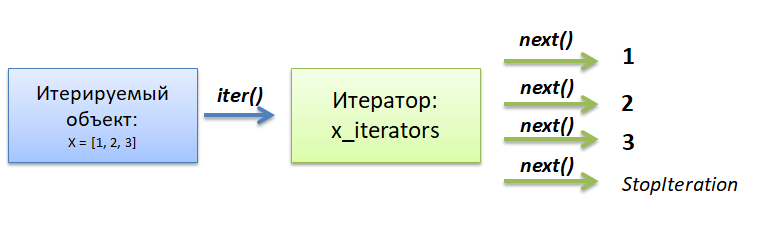

Если мы будем использовать функцию `iter` к итератору, то получим тот же самый итератор:

In [9]:
x = [1, 2, 3]
x_iterators = iter(x)
next(x_iterators)

1

In [10]:
next(x_iterators)

2

In [11]:
next(x_iterators)

3

In [12]:
next(x_iterators)

StopIteration: 

В каких случаях Python использует итерацию? Скорее всего, вы уже использовали итерацию Python, но просто об этом не знали. 

Вот несколько примеров неочевдного использования итерации:

In [13]:
prices = [25, 50, 100]
a, b, c = prices

Или:

In [14]:
x = [1, 85, 2]
print(*x)

1 85 2


***2. Создание собственного итератора***

Теперь мы знаем, что такое итерация, и как она работает. Однако мы еще не умеем самостоятельно создавать итератор, хотя это является ценным навыком для работы. 

Попробуем создать класс, который обеспечивает бесконечное умножение числа на 2:

In [16]:
class DoubleNumber:
    def __init__(self, number):
        self.number = number

    def next(self):
        self.number = self.number * 2
        return self.number

    def iter(self):
        return self

In [17]:
double_six = DoubleNumber(6)
double_six.next()

12

In [18]:
double_six.next()

24

In [19]:
double_six.next()

48

### Циклы for и while

Цикл помогает автоматизировать однотипные действия и проходиться по элементам итерабельных(состоящих из несколльких элементов) объектов: спискам, кортежам, ....

Вводим итератор i - сущность, с помощью которой будем проходить по итерируемому объекту(в данном случае, по range(5) - по числам от 0 до 4, включительно) и для каждого значения итератора из указанных(от 0 до 4) напечатаем это значение. 

In [20]:
for i in range(5):
    print(i)

0
1
2
3
4


Циклы можно вкладывать в циклы. Однако важно помнить о том, чтобы названия итераторов в таком случае отличались для разных циклов, чтобы не привести к ошибочному их использованию. 

In [21]:
for i in range(3):
    for j in ['A', 'B']:
        print(i, j)

0 A
0 B
1 A
1 B
2 A
2 B


Аналогично можно использовать итератр в цикле while. Он будет проходить, пока выполняется условие прописанное в цикле, или не будет прерван принудительно

In [22]:
a = 0
while a <= 5:  # условие выхода из цикла
    print(a**2)
    a += 1  # обновление значения a

0
1
4
9
16
25


## Генераторы

Генераторы - это практически функции-итераторы. Однако вместо стандартного return, в них используется yield для того, чтобы запоминать последнее значение функции и вести от него счет

In [23]:
def counter(n):
    print('Counting')
    while n <= 1000:
        yield n
        n += 1

In [24]:
a = counter(3) # запомним в переменную a значение функции

In [25]:
next(a) # вернем его с помощью уже использованной для итераторов функции next()

Counting


3

In [26]:
next(a)

4

Каждый следующий вызов функции будет возобновлять цикл и возвращать следующий ответ, пока цикл не будет остановлен

Генератор можно создать в одной строке, похожей по синтаксису на создание списка циклом. Однако при создании генератора используются ().

In [27]:
g = (gg**2 for gg in range(5))

In [28]:
g

<generator object <genexpr> at 0x10e65d7d8>

In [29]:
for i in range(5):
    print(next(g))

0
1
4
9
16


In [30]:
type(g)

generator

:)